In [1]:
%matplotlib inline

import matplotlib.pyplot as pl
import numpy as np
import FP_Response

In [12]:
start = 0
stop = 8
x = np.logspace(start, stop, num=1000)

In [13]:
r_a = 0.985
r_b = 1.0 
L = 4000

resp_L = FP_Response.Delta_L(x,r_a,r_b,L)
resp_F = FP_Response.Delta_F(x,r_a,r_b,L)

In [14]:
mag_L = np.absolute(resp_L) 
phs_L = np.angle(resp_L)

mag_F = np.absolute(resp_F) 
phs_F = np.angle(resp_F)

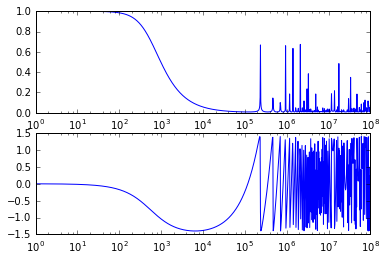

In [15]:
pl.subplot(2,1,1)
pl.semilogx(x,mag_L)

pl.subplot(2,1,2)
pl.semilogx(x,phs_L)

pl.show()

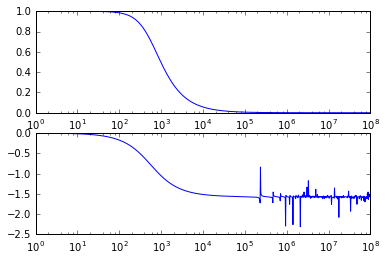

In [16]:
pl.subplot(2,1,1)
pl.semilogx(x,mag_F)

pl.subplot(2,1,2)
pl.semilogx(x,phs_F)

pl.show()